# Box plot

# In brevi
A box plot is also called a box-and-whisker plot. It displays the distribution of a data set using a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also show the average.

![Box plot (T. Kirkman)](http://www.physics.csbsju.edu/stats/box2.html)](images/box_plot.gif)

The whiskers extend to the last value before $Q3 + 1.5 * (Q3 - Q1)$ or $Q3 - 1.5 * (Q3 - Q1)$. Outliers are values beyond the whiskers.

# Example two
The X axis is a variable with many items, called "City". The data for each plot plot is across rows for several columns; these are various scores to be summarized by a box plot.

In [1]:
import pandas as pd
%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [2]:
df = pd.read_csv('data.csv', index_col='City')

In [3]:
# Define chart labels
chart_title = 'Box Plot'
chart_subtitle = 'Balanced Scorecard by Location'
chart_ylabel = 'Score (Index)'
chart_xlabel = 'Location'

(-3.4249999999999998,
 88.424999999999997,
 0.04250000000000001,
 1.3075000000000001)

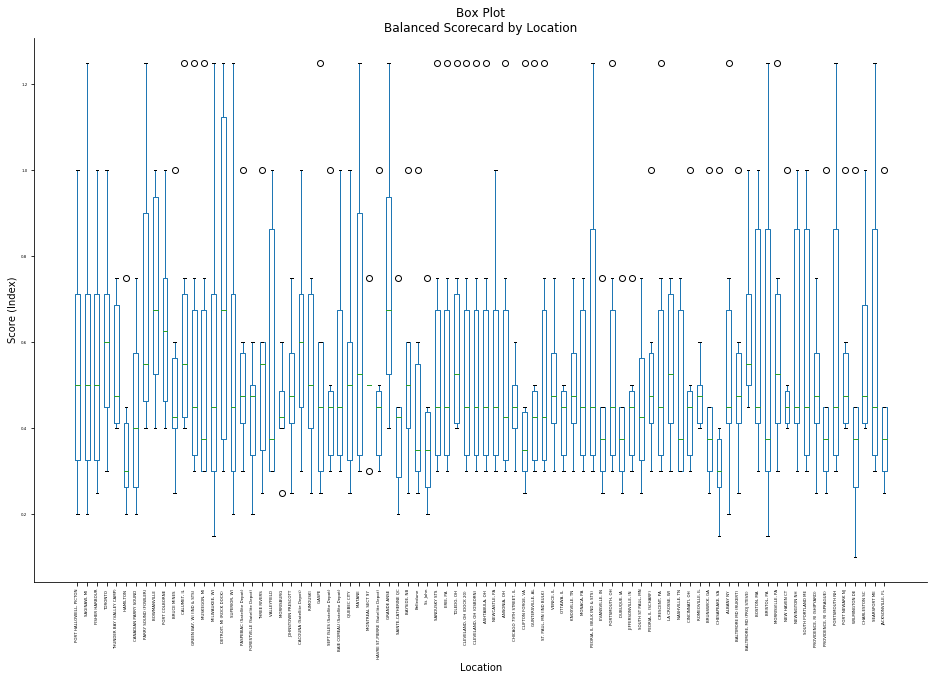

In [4]:
# T is transpose index and columns
#ax = df.T.plot.box(notch=True, showmeans=True)
ax = df.T.plot.box(figsize=(16, 10), rot=90, fontsize=4)
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(chart_title + '\n' + chart_subtitle)
ax.set_ylabel(chart_ylabel)
ax.set_xlabel(chart_xlabel)
ax.axis('auto')

In [5]:
ax.figure.savefig('box_plot.svg', format='svg')
ax.figure.savefig('box_plot.pdf', format='pdf')

# References
Wikipedia. 2017. "Box plot." 2017-08-18. [https://en.wikipedia.org/wiki/Box_plot](https://en.wikipedia.org/wiki/Box_plot).